<a href="https://colab.research.google.com/github/nupur1262/Geeksman_AISquad_Project1_NupurPahuja/blob/master/LOGO_COLAB_2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**IMPORTING Kaggle.json FILE**

In [1]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


##**SETTING ENVIRONMENT VARIABLES**

In [2]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

##**DOWNLOADING THE DATASET FROM KAGGLE**

In [3]:
!kaggle datasets download -d nupurpahuja09/brand-logo-project

 31% 5.00M/16.0M [00:00<00:00, 29.4MB/s]
100% 16.0M/16.0M [00:00<00:00, 63.4MB/s]


##**UNZIPPING THE DOWNLOADED DATA**

In [4]:
!unzip "*.zip"

Archive:  brand-logo-project.zip
  inflating: test_data/00000005.jpg  
  inflating: test_data/00000009.jpg  
  inflating: test_data/00000010.jpg  
  inflating: test_data/00000013.jpg  
  inflating: test_data/00000019.jpg  
  inflating: test_data/00000020.jpg  
  inflating: test_data/00000021.jpg  
  inflating: test_data/00000025.jpg  
  inflating: test_data/00000030.jpg  
  inflating: test_data/00000040.jpg  
  inflating: test_data/00000041.jpg  
  inflating: test_data/00000050.jpg  
  inflating: test_data/00000054.jpg  
  inflating: test_data/00000056.jpg  
  inflating: test_data/00000060.jpg  
  inflating: test_data/00000064.jpg  
  inflating: test_data/00000071.jpg  
  inflating: test_data/00000074.jpg  
  inflating: test_data/00000078.jpg  
  inflating: test_data/00000080.jpg  
  inflating: test_data/00000084.jpg  
  inflating: test_data/00000087.jpg  
  inflating: test_data/00000091.jpg  
  inflating: test_data/00000094.jpg  
  inflating: test_data/00000100.jpg  
  inflating: test

##**IMPORTING REQUIRED LIBRARIES**

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

##**Creating data bunch object , which can further be trained**

In [6]:
path=""
tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, )
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

##**Exploring different classes present in data**

In [7]:
data.classes

['apple',
 'jio',
 'lenovo',
 'mi',
 'micromax',
 'nokia',
 'oneplus',
 'oppo',
 'sam',
 'test_data',
 'vivo']

##**Looking at some examples in data**



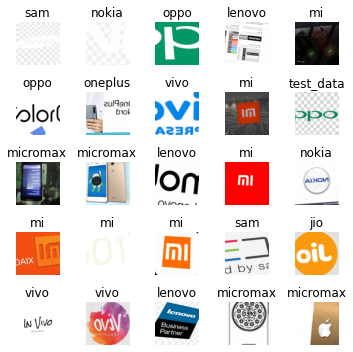

In [8]:
data.show_batch(rows=5, figsize=(5,5))

##***Creating a model to get trained***

**PARAMETERS:**

**data** Databunch we have created(converting data in a format so that it can be trained)

**models.resnet50** resnet50 model will be used.

**metrices** It just show accuracy after each epoch so that we can see how well our model is doing.

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


##**Training the model**

In [10]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,2.938816,2.134427,0.456446,00:28
1,2.397762,2.114166,0.468641,00:27
2,2.070992,1.860952,0.484321,00:27
3,1.770999,1.660959,0.540070,00:28
4,1.516645,1.562315,0.541812,00:29
5,1.309178,1.547670,0.557491,00:29
6,1.123069,1.552051,0.562718,00:28
7,1.011164,1.494361,0.594077,00:28
8,0.917103,1.472183,0.597561,00:28
9,0.868418,1.469060,0.585366,00:28


In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.804378,1.529547,0.578397,00:29
1,0.898967,1.563450,0.588850,00:28
2,0.874332,1.472317,0.599303,00:28
3,0.775298,1.449872,0.611498,00:28


##**Mounting Google Drive**

In [13]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


##**Making a Folder to save the Project**

In [14]:
os.makedirs("/content/drive/My Drive/BRAND-LOGO/logo_recognition",exist_ok=True)

##**Saving our directory path to a variable so that we don"t have to write the code everytime to refer to the directory.**

In [15]:
my_dir="/content/drive/My Drive/BRAND-LOGO/logo_recognition"

##**Saving the state with name as stage-1 in Google drive directory..**

In [16]:
learn.save(my_dir+"/Stage-1")

In [17]:
learn.load("/content/drive/My Drive/BRAND-LOGO/logo_recognition/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (2299 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
oneplus,oneplus,oneplus,oneplus,oneplus
Path: .;

Valid: LabelList (574 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
vivo,sam,oppo,nokia,micromax
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (c

In [18]:
learn.export(my_dir+"/export.pkl")

##**Saving the .pth and .pkl File in the Colab Notebook Itself.**

In [19]:
os.makedirs("/content/export_values",exist_ok=True)
my_path = "/content/export_values"
learn.save(my_path+"/Stage-1")
learn.export(my_path+"/export.pkl")

##**Uploading the .pkl File to the Kora-Drive so that we can use the link afterwards in the Prediction Function.**

In [20]:
!pip install -U kora

     |████████████████████████████████| 51kB 2.7MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 


In [21]:
from kora.drive import upload_public
url2 = upload_public('/content/export_values/export.pkl')
url2

'https://drive.google.com/uc?id=19nQsDYzMXEdfPaUbcvONsvQIBpoSNALc'